In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [3]:
train.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [4]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   tarih       227520 non-null  object 
 1   urun        227520 non-null  object 
 2   besin       227520 non-null  int64  
 3   kategori    227520 non-null  object 
 4   fiyat       227520 non-null  float64
 5   uretimyeri  227520 non-null  object 
 6   market      227520 non-null  object 
 7   sehir       227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [226]:
train.shape

(227520, 8)

In [227]:
train.isnull().sum()

tarih         0
urun          0
besin         0
kategori      0
fiyat         0
uretimyeri    0
market        0
sehir         0
dtype: int64

In [228]:
train.urun.nunique()

79

In [229]:
train.tarih.unique()

array(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
       '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
       '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
       '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
      dtype=object)

In [230]:
train.urun.unique()

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [231]:
train.urun.value_counts()

kıyma            2880
salam            2880
Çilek            2880
Armut            2880
tereyağ          2880
                 ... 
Nohut            2880
Mercimek-kuru    2880
Marul            2880
Mantar           2880
ceviz            2880
Name: urun, Length: 79, dtype: int64

In [232]:
train.besin.unique()

array([120, 103, 160, 354,  72,  42, 346,  47,  25,  63, 333,  35,   8,
        19,  38,  24,  16,  15, 351, 376,  83,  27,  52,  32, 247, 350,
       390, 353, 368, 329, 402, 100, 150, 170, 200,  90, 125, 250, 400,
       375,  57,  39,  60,  80,  93,  28,  54,  79,  17,  36,  77,  41,
        49,  74, 110, 115], dtype=int64)

In [233]:
train.besin.nunique()

56

In [234]:
train.besin.value_counts()

42     11520
25     11520
120     8640
353     8640
24      8640
390     8640
57      5760
52      5760
350     5760
351     5760
47      5760
125     5760
90      5760
100     5760
110     5760
39      2880
400     2880
375     2880
250     2880
93      2880
60      2880
80      2880
170     2880
28      2880
54      2880
79      2880
17      2880
36      2880
77      2880
41      2880
49      2880
74      2880
200     2880
368     2880
150     2880
402     2880
160     2880
354     2880
72      2880
346     2880
63      2880
333     2880
35      2880
8       2880
19      2880
38      2880
16      2880
15      2880
376     2880
83      2880
27      2880
32      2880
247     2880
103     2880
329     2880
115     2880
Name: besin, dtype: int64

In [235]:
train.kategori.unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [236]:
train.kategori.nunique()

6

In [237]:
train.kategori.unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [238]:
train.uretimyeri.unique()

array(['Yurt içi', 'Yurt dışı'], dtype=object)

In [239]:
train.uretimyeri.value_counts()

Yurt içi     113760
Yurt dışı    113760
Name: uretimyeri, dtype: int64

In [240]:
train.market.unique()

array(['M', 'C', 'B'], dtype=object)

In [241]:
train.market.value_counts()

M    75840
C    75840
B    75840
Name: market, dtype: int64

In [242]:
train.sehir.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [243]:
train.sehir.value_counts()

A    28440
B    28440
C    28440
D    28440
E    28440
F    28440
G    28440
H    28440
Name: sehir, dtype: int64

In [244]:
train.isnull().sum()

tarih         0
urun          0
besin         0
kategori      0
fiyat         0
uretimyeri    0
market        0
sehir         0
dtype: int64

In [247]:
'''Ürünlerin ortalama değerleri alındığında yaklaşık olarak liner bir aatış görülmektedir.
   Ortalama bir artış değeri ülkenin yıllar içindeki artışına eşit diyebiliriz'''

'Ürünlerin ortalama değerleri alındığında yaklaşık olarak liner bir aatış görülmektedir.\n   Ortalama bir artış değeri ülkenin yıllar içindeki artışına eşit diyebiliriz'

In [248]:
urunler=train["urun"].unique()

In [249]:
urunler

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [250]:
#Ürün Bazında 5 Yıl için Aylık Enflasyon Değerinin Hesaplanması

In [285]:
toplam_enflasyon=0
enflasyon=0
for urun in urunler:
    malzeme= train[train['urun'].isin([urun])]
    aylik_enflasyon=malzeme.groupby("tarih").mean()
    #aylik_enflasyon=aylik_enflasyon[12:] # 2016 yılını tamamen çıkarırsak daha iyi bir sonuç elde edebiliyoruz.
    aylik_enflasyon["enflasyon"]=0
    aylik_enflasyon=aylik_enflasyon.drop("besin",axis=1)
    for x in range(59):
        if x==59:
            aylik_enflasyon.iloc[x:y,2:3]=0
        else:
            y=x+1
            z=y+1
            aylik_enflasyon.iloc[x:y,1:2]=aylik_enflasyon.iloc[y:z,0:1].values/aylik_enflasyon.iloc[x:y,0:1].values
            #aylik_enflasyon.iloc[x:y,2:3]=aylik_enflasyon.iloc[y:z,0:1].values-aylik_enflasyon.iloc[x:y,0:1].values
            #aylik_enflasyon.iloc[x:y,3:4]=(aylik_enflasyon.iloc[x:y,2:3].values*100)/aylik_enflasyon.iloc[x:y,0:1].values
    toplam_enflasyon=toplam_enflasyon+(aylik_enflasyon["enflasyon"].sum()/58)

In [286]:
aylik_enflasyon.head()

,fiyat,enflasyon
tarih,,
2016-01-01,18.120833,1.010152
2016-02-01,18.304792,1.012713
2016-03-01,18.537500,1.019375
2016-04-01,18.896667,1.015721
2016-05-01,19.193750,1.015836


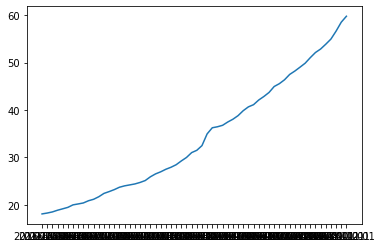

In [287]:
fiyat = aylik_enflasyon['fiyat']
plt.plot(fiyat)

In [254]:
# Her bir ürün için ortalama aylık enflasyon

In [255]:
enflasyon=toplam_enflasyon/79

In [256]:
# 2020 Aralık Ayı verileri

In [257]:
tarih2020=train.iloc[223728:,:]

In [258]:
# 2021 Yılının her ayı için ürün fiyatlarının hesaplanması

In [259]:
ocak2021=tarih2020["fiyat"]*enflasyon
subat2021=ocak2021*enflasyon
mart2021=subat2021*enflasyon
nisan2021=mart2021*enflasyon
mayıs2021=nisan2021*enflasyon
haziran2021=mayıs2021*enflasyon
temmuz2021=haziran2021*enflasyon
agustos2021=temmuz2021*enflasyon
eylul2021=agustos2021*enflasyon
ekim2021=eylul2021*enflasyon
kasim2021=ekim2021*enflasyon
aralik2021=kasim2021*enflasyon

In [260]:
# 2021 Yılının Toplu Hale Getirilmesi

In [261]:
tarih2021=pd.concat([ocak2021,subat2021,mart2021,nisan2021,mayıs2021,haziran2021,temmuz2021,agustos2021,eylul2021,ekim2021,kasim2021,aralik2021]).reset_index()

In [262]:
tarih2021.head()

,index,fiyat
0,223728,120.280588
1,223729,39.089633
2,223730,39.640045
3,223731,23.750795
4,223732,42.350565


In [263]:
sutunisimler=["id","ürün fiyatı"]
tarih2021.columns=sutunisimler

In [264]:
tarih2021["id"]=tarih2021.index

In [265]:
#tarih2021.to_csv("veriler\datathon\sonuclar\\datathon_final.csv",index=False)